# Workflow
## MaxQuant
For the analysis we require the `proteinGroups.txt` generated by MaxQuant and a corresponding metadata file where the sample names match with the sample names in the proteinGroups.txt file. 
At first take a look at the files:

In [18]:
import pandas as pd
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl") # remove warning from mac

The `proteinGroups.txt` contains all standard column headers from MaxQuant. Later, for our analysis we will use 
the Protein Intensity described in `"LFQ intensity [sample]"`.

In [19]:
protein_groups = pd.read_csv("../../testfiles/maxquant_proteinGroups.txt", sep = "\t", low_memory=False)
protein_groups.head(5)

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,P01911;Q29830;Q9MXZ4;Q3LTJ8;Q3LTJ4;Q3LRY0;Q8HW...,P01911;Q29830;Q9MXZ4;Q3LTJ8;Q3LTJ4;Q3LRY0;Q8HW...,4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;...,4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;4;...,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,"HLA class II histocompatibility antigen, DRB1-...",HLA-DRB1;HLA-DR15;HLA-DRB1*;HLA-DRB1*1327;MHC ...,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...,1834.0,4.0,...,NaN,0.0,1287;1288;3971;15222,True;True;True;True,1415;1416;4387;16993,117340;117341;117342;117343;117344;117345;1173...,56384;56385;56386;159948;159949;159950;602426;...,56384;56385;159949;602427,NaN,NaN
1,P05121;A0A024QYT5;B7ZAB0;B7Z4X6;B7Z1D9,P05121;A0A024QYT5;B7ZAB0;B7Z4X6;B7Z1D9,10;10;9;8;5,10;10;9;8;5,10;10;9;8;5,Plasminogen activator inhibitor 1,SERPINE1,;;;;,5.0,10.0,...,NaN,1.0,1592;3771;4396;4628;6470;7404;9193;11222;13191...,True;True;True;True;True;True;True;True;True;True,1746;4166;4871;5128;7155;8188;10148;10149;1257...,136637;136638;136639;136640;136641;318672;3186...,64917;149749;149750;178775;178776;184126;25946...,64917;149749;178775;184126;259465;290355;36587...,NaN,NaN
2,P55083;A0A024QZ34;K7ES70,P55083;A0A024QZ34;K7ES70,2;2;2,2;2;2,2;2;2,Microfibril-associated glycoprotein 4,MFAP4,;;,3.0,2.0,...,NaN,2.0,140;15067,True;True,155;156;16823,13174;13175;13176;13177;13178;13179;13180;1318...,7599;7600;7601;7602;7603;7604;7605;7606;598026...,7604;598026,0,117
3,P09972;A0A024QZ64;A8MVZ9;B7Z3K9;B7Z1N6;B7Z3K7;...,P09972;A0A024QZ64;A8MVZ9;B7Z3K9;B7Z1N6;B7Z3K7;...,16;16;15;15;13;12;10;10;9;8;7;7;7;5,13;13;13;12;10;10;9;9;8;5;7;7;6;4,2;2;2;2;0;2;2;2;2;0;2;2;0;0,Fructose-bisphosphate aldolase C;Fructose-bisp...,ALDOC,;;;;;;;;;,14.0,16.0,...,NaN,3.0,312;749;1545;1675;2085;3265;5046;5708;8847;884...,True;True;True;False;True;True;True;True;True;...,346;827;1698;1838;2304;3606;5586;5587;6314;976...,29006;29007;29008;69091;69092;69093;69094;6909...,15520;15521;34013;34014;34015;34016;34017;6325...,15520;34015;63252;67942;84108;131214;198759;21...,1;2,40;251
4,Q96C19;H0Y4Y4;A0A024QZ77,Q96C19;H0Y4Y4;A0A024QZ77,1;1;1,1;1;1,1;1;1,EF-hand domain-containing protein D2,EFHD2,;;,3.0,1.0,...,NaN,4.0,8772,True,9685,734937;734938;734939;734940;734941;734942;734943,342134;342135,342134,NaN,NaN


Further, we created a excel-file with the corresponding metadata to our proteinGroups.txt-file. The sample names in the column "sample" match the names in `proteinGroups.txt` file.

In [20]:
metadata = pd.read_excel("../../testfiles/maxquant_metadata.xlsx")
metadata.head(5)

,subject external_id,biological_sample external_id,sample,tissue id,disease id,intervention id,tissue,disease,biological_sample quantity,biological_sample quantity_units,...,Alanine aminotransferase measurement (34608000),Aspartate aminotransferase measurement (45896001),Alkaline phosphatase measurement (88810008),Gamma glutamyl transferase measurement (69480007),Hemoglobin A1c measurement (43396009),Total cholesterol:HDL ratio measurement (166842003),High density lipoprotein measurement (17888004),Low density lipoprotein cholesterol measurement (113079009),VLDL cholesterol measurement (104585005),Triglycerides measurement (14740000)
0,31,31,1_31_C6,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,24.0,30,54,21.0,6.3,3.6,1.26,2.1,0.3,0.58
1,32,32,1_32_C7,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,27.0,28,27,38.0,5.8,6.6,1.70,4.3,0.6,1.24
2,33,33,1_33_C8,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,18.0,21,69,18.0,6.2,5.7,1.12,4.1,0.5,1.12
3,34,34,1_34_C9,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,22.0,26,101,20.0,6.2,6.7,0.91,4.8,1.0,2.20
4,35,35,1_35_C10,BTO:0000131,NaN,NaN,blood plasma,healthy,NaN,NaN,...,18.0,25,61,13.0,5.4,5.5,1.21,3.9,0.4,0.90


## 0. Import AlphaStats

In [21]:
import alphastats

## 1. Import Data

In [22]:
maxquant_data = alphastats.MaxQuantLoader(file="../../testfiles/maxquant_proteinGroups.txt",
                                          intensity_column="LFQ intensity [sample]",
                                          index_column="Protein IDs")

## 2. Create a DataSet
Combine the imported MaxQuant data with the metadata

In [23]:
ds = alphastats.DataSet(
    loader = maxquant_data, 
    metadata_path = "../../testfiles/maxquant_metadata.xlsx",
    sample_column = "sample" # specify the column that corresponds to the sample names in proteinGroups
)

AlphaStats will create a matrix of the Protein Intensities, which will be accessable using `ds.mat` and will save the metadta as a dataframe `ds.metadata`. 
Our original MaxQuant ProteinGroup file contains much more samples, than we have metadata for

## 3. Preprocess

In [24]:
print(f"Number of samples in the matrix: {ds.mat.shape[0]}, number of samples in metadata: {ds.metadata.shape[0]}.")

Number of samples in the matrix: 312, number of samples in metadata: 48.


Firstly, we will subset the matrix it will only contains samples, that are also described in the metadata.

In [25]:
ds.preprocess(subset=True)

In [26]:
print(f"Number of samples in the matrix: {ds.mat.shape[0]}, number of samples in metadata: {ds.metadata.shape[0]}.")

Number of samples in the matrix: 48, number of samples in metadata: 48.


### Unnormalized data, Sample Distribution

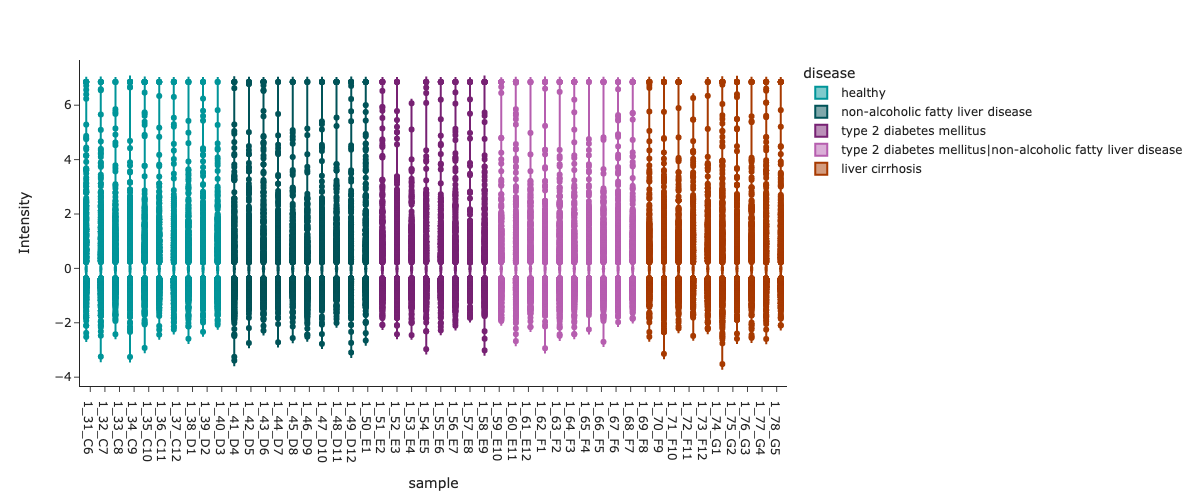

In [27]:
ds.plot_sampledistribution(color = "disease")
Image(fig_distribution.to_image(format="png", width =1200))

- Contaminations get removed indicated in following columns Only identified by site, Reverse, Potential contaminant (MaxQuant specific) and contamination_library (added by AlphaStats)
- Normalized using quantile normalization
- Missing Values get imputed using K-nearest neighbour imputation

In [28]:
ds.preprocess(
    remove_contaminations=True,
    normalization = "quantile",
    imputation = "knn"
)

/Users/drq441/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning:

n_quantiles (1000) is greater than the total number of samples (48). n_quantiles is set to n_samples.



### After quantile normalization, Sample Distribution

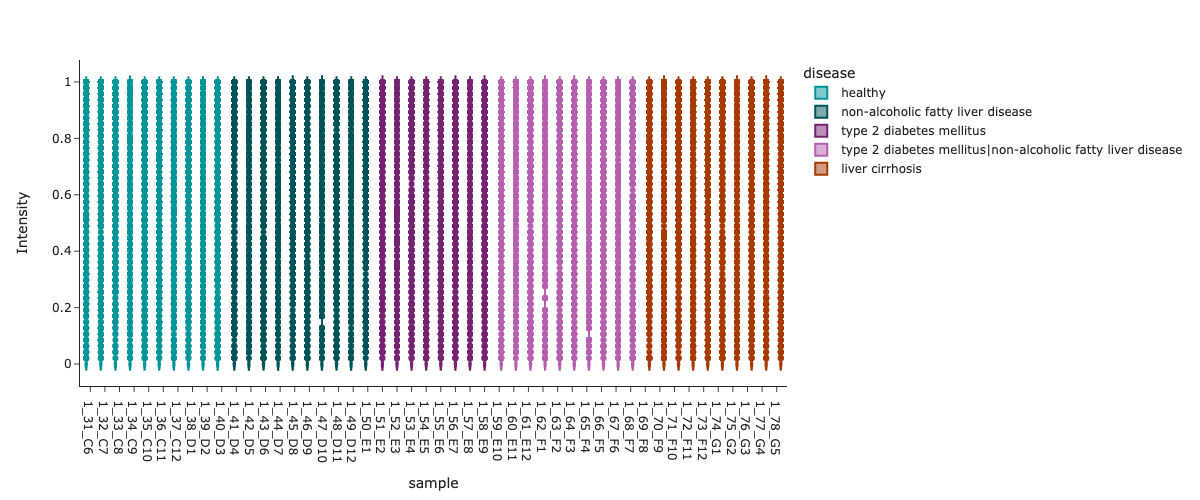

In [29]:
fig_distribution = ds.plot_sampledistribution(color = "disease")
Image(fig_distribution.to_image(format="png", width =1200))

The preprocessing steps can be accessed using:

In [30]:
ds.preprocess_print_info()

Preprocessing: 
The raw data contains 2611 Proteins/ProteinGroups.
The filtered data contains 2047 Proteins/ProteinGroups.Data has been normalized using quantile normalization. 
Missing values were imputed using the k-Nearest Neighbor.
Contaminations indicated in following columns: ['Only identified by site', 'Reverse', 'Potential contaminant', 'contamination_library'] were removed. In total 202 observations have been removed.


## 4. Visualization

### Principal Component Analysis (PCA)

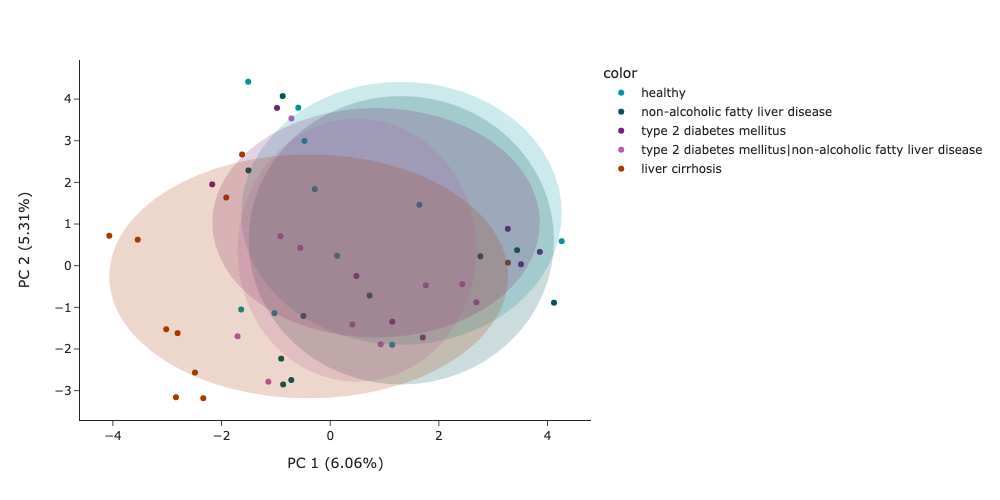

In [31]:
pca_fig = ds.plot_pca(group = "disease", circle = True)
Image(pca_fig.to_image(format="png", width=1000))